# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.debugging.set_log_device_placement(False) 

In [2]:
dataset = get_dataset("./data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [22]:
def display_instances(batch, ax):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    from matplotlib.patches import Rectangle as R
    image = batch['image']
    boxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    
    w, h, _ = image.shape
    
    colors = {
        1:"red", 
        2:"blue", 
        4:"green"
    }
    
    ax.imshow(image.numpy().astype(np.uint8))
    for box, cls in zip(boxes, classes):
        y1, x1, y2, x2 = box
        y1 *= h
        y2 *= h
        x1 *= w
        x2 *= w
        rect = R((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=colors[cls], linewidth=0.5)
        ax.add_patch(rect)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

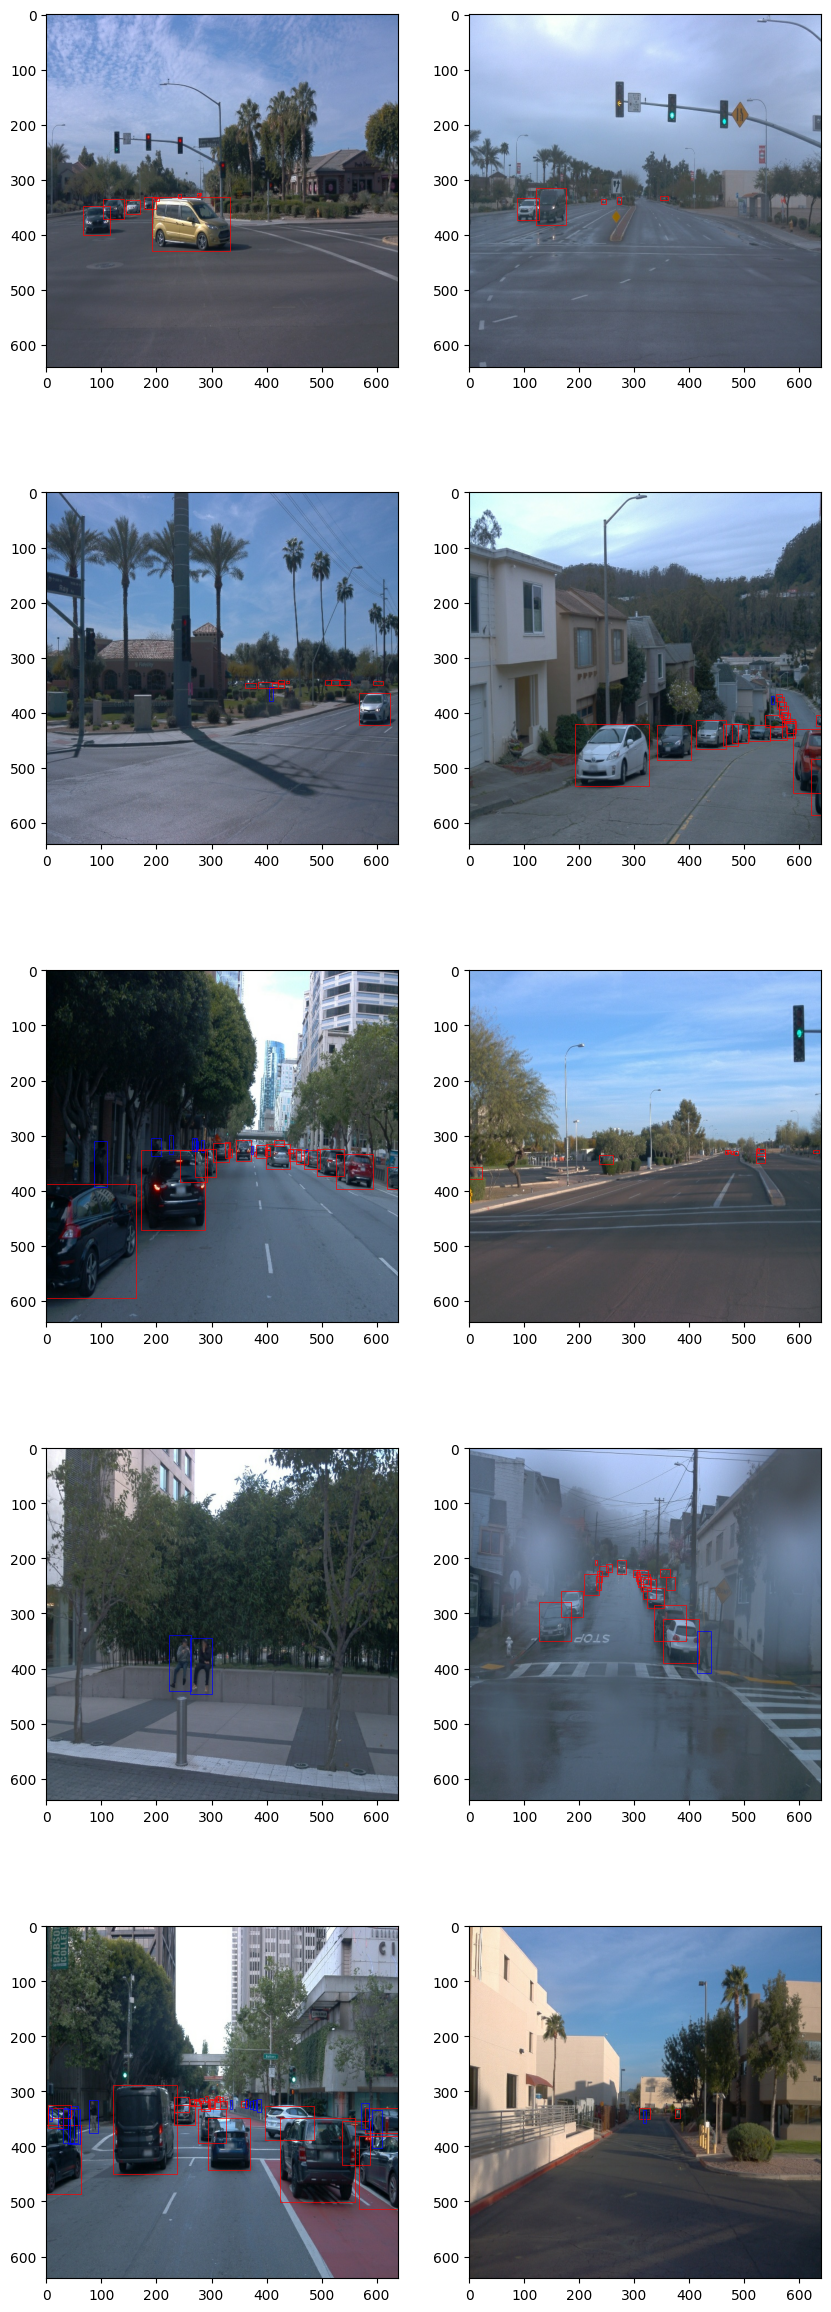

In [24]:
# import matplotlib.pyplot as plt
import numpy as np

f, axes = plt.subplots(5, 2, figsize=(10, 30))
axes = axes.flatten()

batch = dataset.shuffle(50).take(10)
for i, b in enumerate(batch):
    display_instances(b, axes[i])
    
plt.show()
f.savefig('exploration_0.png')

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### Color Distribution

In [3]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.8 MB/s eta 0:00:0000:01


In [4]:
import seaborn as sn
images = []
for i, b in enumerate(dataset.take(86)):
    print(i, end=", ")
    images.append(b['image'].numpy())

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 

In [10]:
import cv2

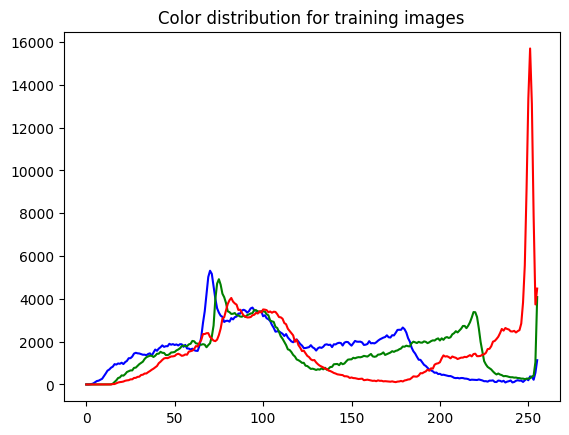

<Figure size 640x480 with 0 Axes>

In [25]:
colors = ('b','g','r')

for i,color in enumerate(colors):
    hist = cv2.calcHist(images,[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('Color distribution for training images')
plt.show()
plt.savefig("exploration_1.png")

In [27]:
classes = []
for b in dataset.take(86):
    classes.extend(list(b['groundtruth_classes'].numpy()))

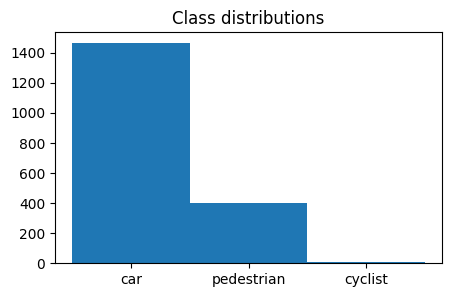

In [28]:
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(classes, bins = [1, 2, 3, 4])
 
# Show plot
plt.title("Class distributions")
plt.xticks([1.5, 2.5, 3.5], ["car", "pedestrian", "cyclist"])
plt.show()
fig.savefig("exploration_2.png")